# Julia Scratchpad for VMLS

In [1]:
# Already Installed the appropriate libraries

In [2]:
using LinearAlgebra, SparseArrays, VMLS, Plots

In [3]:
a = [1, 2, 3]
typeof(a)

Array{Int64,1}

In [4]:
length(a)

3

In [5]:
# Mini-Python API for utility, error-correction, and poka-yoke (see https://www.google.com/search?q=Poka-yoke)
type = typeof
len = length

length (generic function with 177 methods)

## Cuidado!
- Always remember commas between elements in Julia (or we'll get something that's not a vector)
- Always remember square brackets for vectors/arrays or we'll get tuples

In [6]:
# Julia indexing is 1-index
a = [5, 6, 7, 8]
a[1]

5

In [7]:
# Assignment vs. copying
# It appears that Julia assignment works like referenes to objects...
a = [1, 2, 3]
b = a
b[2] = 5
a

3-element Array{Int64,1}:
 1
 5
 3

In [8]:
# So if we want a copy, we'll need to make a copy
a = [1, 2, 3]
b = copy(a)
b[2] = 5
a

3-element Array{Int64,1}:
 1
 2
 3

In [9]:
# Vector Equality
a == b

false

In [10]:
a == [1, 2, 3]

true

In [11]:
# Julia doesn't treat 1-vectors as scalars or scalars as 1-vectors, unfortunately.
# It would be nice to expand the functionality of the data types and operators to support this...
1 == [1]

false

In [12]:
a = [3]
3 == a[1]

true

In [13]:
# Blocked or stacked Vectors use the semicolon operator or the vcat vertical concatenation function
x = [1, 2, 3]
y = [4, 5, 6]
z = [x; y]
z

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [14]:
z = vcat(x, y)
z

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [15]:
# As with the mathematical notation, we can concatenate/block/stack vectors with scalars
z = [x; 3.141; y; [4, 4]]

9-element Array{Float64,1}:
 1.0
 2.0
 3.0
 3.141
 4.0
 5.0
 6.0
 4.0
 4.0

In [16]:
# Subvectors and slicing
# Slicing is inclusive of beginning and ending elements
a = [5, 6, 7, 8]
a[1:3]

3-element Array{Int64,1}:
 5
 6
 7

In [17]:
# Reassign a slice
a[1:3] = [2, 2, 2]
a

4-element Array{Int64,1}:
 2
 2
 2
 8

In [18]:
1 in [1, 2, 3]

true

In [19]:
# this would be cooler if it were vectorized...
[1, 2] in [2, 2, 3]

false

In [20]:
# The issubset function works
issubset([1, 2], [1, 2, 3])

true

In [21]:
# Holy Guacamole!
# Use the latex symbol \subseteq and it works
[1, 2] ⊆ [1, 2, 3]

true

In [22]:
π * 4

12.566370614359172

In [23]:
# The latex \leq produces the correct operator and the correct operation!
2 ≤ 3

true

In [24]:
# The latex \in symbol is fully operational (for scalar membership)
2 ∈ [1, 2, 3]

true

In [25]:
[1, 2] ∈ [[1, 2], 3]

true

In [26]:
[1] ∈ [1; 2; 3]

false

In [27]:
a = [1, 2, 3, 4, 5]

# the end argument is right on target!
a[3:end]

3-element Array{Int64,1}:
 3
 4
 5

In [28]:
# End returns the last element of the array
a[end]

5

In [29]:
x = [1, 0, 0, -2, 2]

# Build a vector of differences using "end"
# "end-1" needs the operator/operands right close together
d = x[2:end] - x[1:end-1]

4-element Array{Int64,1}:
 -1
  0
 -2
  4

In [30]:
# Making lists of vectors in Julia
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
list = [a, b, c]

3-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]

In [31]:
# second element of the list
list[2]

3-element Array{Int64,1}:
 4
 5
 6

In [32]:
# NOTE the difference between the list [a, b, c] (which is an array of arrays) and the block vector [a; b; c]

In [33]:
# list of vectors vs. concatednated vectors
a = [1, 2]
b = [2, 3]
c = [3, 4]

# block/stack/concatenated vectors
d = [a; b; c]

e = [a, b, c]

println("d is", d)
println("e is", e)

d is[1, 2, 2, 3, 3, 4]
e is[[1, 2], [2, 3], [3, 4]]


In [34]:
# Zero vectors
zeros(2)

2-element Array{Float64,1}:
 0.0
 0.0

In [35]:
# Creates a vector of zeros the length of a
zeros(length(a))

2-element Array{Float64,1}:
 0.0
 0.0

In [36]:
# Unit vectors
i = 2; n = 4;

ei = zeros(n)

# Set the i-th element to 1
ei[i] = 1 
ei

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

In [37]:
function unit_vector(i, n)
    return [zeros(i-1); i; [zeros(n-i)]]
end

unit_vector (generic function with 1 method)

In [38]:
# Another way to create ei

# This creates a funcion
unit_vector(i, n) = [zeros(i-1); 1; zeros(n-i)]

unit_vector (generic function with 1 method)

In [39]:
println("e_i for 1 is ", unit_vector(1, 3))
println("e_i for 2 is ", unit_vector(2, 3))
println("e_i for 3 is ", unit_vector(3, 3))

e_i for 1 is [1.0, 0.0, 0.0]
e_i for 2 is [0.0, 1.0, 0.0]
e_i for 3 is [0.0, 0.0, 1.0]


In [40]:
# Ones vector
ones(2)

2-element Array{Float64,1}:
 1.0
 1.0

In [41]:
# rand is a function that makes a vector of random numbers between 0 and 1
rand(3)

3-element Array{Float64,1}:
 0.14320610267510614
 0.06367431871484874
 0.7216466021087671

In [42]:
# randn generates random numbers with a Gaussian distribution
randn(3)

3-element Array{Float64,1}:
 1.8653214103709095
 2.306965127535671
 1.8679320372391532

## Plotting with Plots.jl

In [43]:
# import
using Plots

In [44]:
temps = rand(20) * 80

20-element Array{Float64,1}:
 24.764409548687585
 38.706178924577074
 29.323254039516886
 59.58703730500544
 47.817423732178845
 22.79032547037435
 54.96002944359694
 57.93055029306629
 63.90584839416567
 74.8991392930482
  7.8401391970073675
  1.4737657952928451
 77.48291711931957
 46.25323359477831
 78.05680690306366
 34.630251444676375
 34.199497601681955
 23.036195792631027
 61.948778315115725
 61.623304604290766

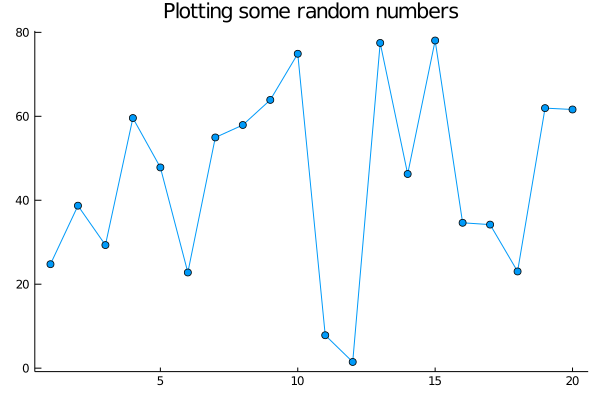

In [45]:
plot(temps, marker = :circle, legend=false, grid=false, title="Plotting some random numbers")

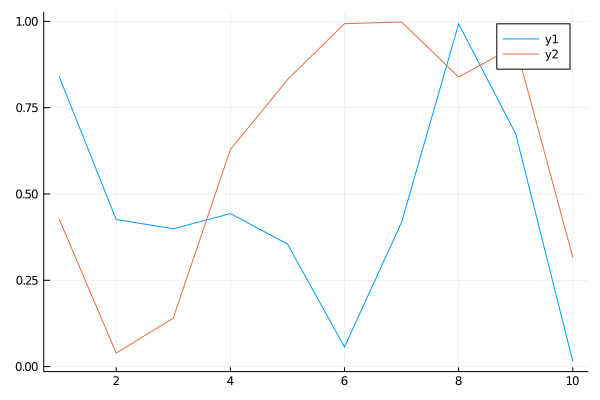

In [46]:
x = 1:10
y = rand(10, 2) # 2 columns means two lines
plot(x, y)

In [47]:
# vector addition
a = [1, 2]
b = [3, 3]
c = a + b

2-element Array{Int64,1}:
 4
 5

In [48]:
# Scalar-Vector Multiplication
a * 5

2-element Array{Int64,1}:
  5
 10

In [49]:
# scalar-vector division
a / 2

2-element Array{Float64,1}:
 0.5
 1.0

In [50]:
# add a scalar to each element in a vector
# the . dot notation vectorizes the + operator
a .+ 4

2-element Array{Int64,1}:
 5
 6

In [51]:
# Element-wise operations
# This is element-wise division

initial = [1, 2, 3, 4, 5]
final = [1, 3, 5, 6, 7]

r = (final - initial) ./ initial

5-element Array{Float64,1}:
 0.0
 0.5
 0.6666666666666666
 0.5
 0.4

In [52]:
# element-wise operations with a scalar
w = [1, 2, 2]
z = [1, 2, 3]
w == z # compares the entire vector

false

In [53]:
w .== z # bit array holding each equality at each index

3-element BitArray{1}:
 1
 1
 0

In [54]:
# we can combine element-wise operations with conditions like so:
x = randn(5)

# Obtain the boolean mask
x .> 0

5-element BitArray{1}:
 0
 0
 1
 1
 1

In [55]:
# Return only the positive values
x[x .> 0]

3-element Array{Float64,1}:
 2.401432507575197
 1.3509359250766024
 0.720432048143068

In [56]:
# dot notation works with assignment, too
x = [1, 2, 4]
x[2:3] .= 3
x

3-element Array{Int64,1}:
 1
 3
 3

## Linear Combinations
We can form linear combinations in Julia using scalar-vector multiplication and addition

In [57]:
a = [1, 2]
b = [3, 4]
alpha = -.5
beta = 1.5
c = alpha*a + beta*b

2-element Array{Float64,1}:
 4.0
 5.0

In [58]:
# Let's make a function that produces linear combinations!
function linear_combination(coeff, vectors)
    n = length(vectors[1]) # Length of vectors
    a = zeros(n)
    for i = 1:length(vectors)
        a = a + coeff[i] * vectors[i]
    end
    return a
end


linear_combination (generic function with 1 method)

In [59]:
a = [1, 2]
b = [3, 4]
alpha = -.5
beta = 1.5
linear_combination((alpha, beta), (a, b))

2-element Array{Float64,1}:
 4.0
 5.0

In [60]:
# A more concise definition
function lincomb(coeff, vectors)
    return sum(coeff[i] * vectors[i] for i = 1:length(vectors))
end

lincomb((alpha, beta), (a, b))

2-element Array{Float64,1}:
 4.0
 5.0

## Checking Properties!
- let's check the disributive property
- $\beta(a + b) = \beta a + \beta b$

In [85]:
a = rand(3); b = rand(3)
beta = rand()

0.06793256705570494

In [86]:
lhs = beta*(a + b)

3-element Array{Float64,1}:
 0.07920314999464437
 0.06504131362869045
 0.04723093451359907

In [87]:
rhs = beta*a + beta*b

3-element Array{Float64,1}:
 0.07920314999464437
 0.06504131362869045
 0.04723093451359906

In [88]:
# arrays are approximately equal
lhs ≈ rhs

true

In [89]:
# let's check element-wise approximate equality
lhs .≈ rhs

3-element BitArray{1}:
 1
 1
 1

In [94]:
# Since == is exact, we should probably use \approx to account for rounding errors and ieee754 floating point issues
lhs == rhs

false

In [95]:
lhs .== rhs

3-element BitArray{1}:
 1
 1
 0

## Inner Product

In [96]:
x = [1, 2, 3]
y = [2, 3, 4]
x'y

20

In [100]:
# Net present value (Net present value of a cashflow vector c, with per-period interest rate r)
c = [0.1, 0.1, 0.1, 1.1] # Cashflow vector
n = length(c)
r = 0.05 # 5% per period interest rate

d = (1 + r).^ -(0:n-1)

4-element Array{Float64,1}:
 1.0
 0.9523809523809523
 0.9070294784580498
 0.863837598531476

In [101]:
NPV = c'd

1.236162401468524

In [115]:
# school aged population is between 6 to 19
s = [zeros(5); ones(14); zeros(81)]

# Produce a random distribution of number of people per age
x = rand(length(s)) * 1000

# Inner product of s and x is the sum
round(s'x)

8718.0

## Complexity of Vector Computations
- Floating point operations
- Example: $(a + b)(a - b) = a^2 - b^2$

In [118]:
a = rand(); b = rand()
lhs = (a + b) * (a - b)
rhs = a^2 - b^2

0.24011440670316742

In [119]:
lhs == rhs

false

In [120]:
lhs ≈ rhs

true

In [121]:
# Complexity of operations
# With Julia, we can add @time to time things
a = rand(10^5); b = rand(10^5)
@time a'b

  0.000151 seconds (2 allocations: 32 bytes)


25056.07971812992

In [122]:
@time a'b

  0.000116 seconds (2 allocations: 32 bytes)


25056.07971812992

In [124]:
# Working with sparse vectors
a = sparsevec([123456, 123457], [1.0, -1.0], 10^6)

1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  1.0
  [123457 ]  =  -1.0

In [126]:
# Number of nonzero entries
nnz(a)

2

In [129]:
b = randn(10^6) # an ordinary vector of the same length

  0.079481 seconds (167.76 k allocations: 8.395 MiB)


1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  2.0
  [123457 ]  =  -2.0

In [130]:
@time 2*a


  0.000007 seconds (3 allocations: 224 bytes)


1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  2.0
  [123457 ]  =  -2.0

In [131]:
@time 2*b

  0.014833 seconds (103 allocations: 7.635 MiB, 68.25% gc time)


1000000-element Array{Float64,1}:
  1.871638614263517
 -3.57427630862097
  0.09378814874229188
  4.979501223312514
  2.1695077704446373
  2.7327143397031826
  0.6841217575149326
 -2.1696733508921797
  4.075242413909834
  2.9875477149186223
 -1.703582886013732
 -1.1160256834227409
  1.259897665121962
  ⋮
 -1.8787046124871911
  0.6609790614114054
  3.1482661588891614
 -1.2973384703734068
 -2.8943268359410457
  3.1359170801219047
  1.6126823032524389
  1.0066555858095216
 -3.243927765080001
  1.3043480889605072
  1.228439885780828
 -0.6246853709913928

In [132]:
@time b'b

  0.000431 seconds (2 allocations: 32 bytes)


1.0004412605874831e6

In [133]:
@time a'a

  0.073696 seconds (96.14 k allocations: 5.001 MiB)


2.0

In [134]:
@time c = a + b

  0.426075 seconds (1.36 M allocations: 99.444 MiB, 5.64% gc time)


1000000-element SparseVector{Float64,Int64} with 1000000 stored entries:
  [1      ]  =  0.935819
  [2      ]  =  -1.78714
  [3      ]  =  0.0468941
  [4      ]  =  2.48975
  [5      ]  =  1.08475
  [6      ]  =  1.36636
  [7      ]  =  0.342061
  [8      ]  =  -1.08484
  [9      ]  =  2.03762
  [10     ]  =  1.49377
             ⋮
  [999990 ]  =  0.33049
  [999991 ]  =  1.57413
  [999992 ]  =  -0.648669
  [999993 ]  =  -1.44716
  [999994 ]  =  1.56796
  [999995 ]  =  0.806341
  [999996 ]  =  0.503328
  [999997 ]  =  -1.62196
  [999998 ]  =  0.652174
  [999999 ]  =  0.61422
  [1000000]  =  -0.312343